# US Country Deaths Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
#loading the file
df=pd.read_csv('covid_new.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
#checking shape of a dataset
df.shape

(58, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [5]:
#checking null values
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [6]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [7]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [8]:
#treating with the missing values
df['Lat'].fillna(df['Lat'].mean(),inplace=True)
df['Long_'].fillna(df['Long_'].mean(),inplace=True)
df['Recovered'].fillna(df['Recovered'].mean(),inplace=True)
df['Incident_Rate'].fillna(df['Incident_Rate'].mean(),inplace=True)
df['People_Tested'].fillna(df['People_Tested'].mean(),inplace=True)
df['People_Hospitalized'].fillna(df['People_Hospitalized'].mean(),inplace=True)
df['Mortality_Rate'].fillna(df['Mortality_Rate'].mean(),inplace=True)
df['Testing_Rate'].fillna(df['Testing_Rate'].mean(),inplace=True)
df['Hospitalization_Rate'].fillna(df['Hospitalization_Rate'].mean(),inplace=True)


In [9]:
#Again checking the missing values
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

There are no missing values now

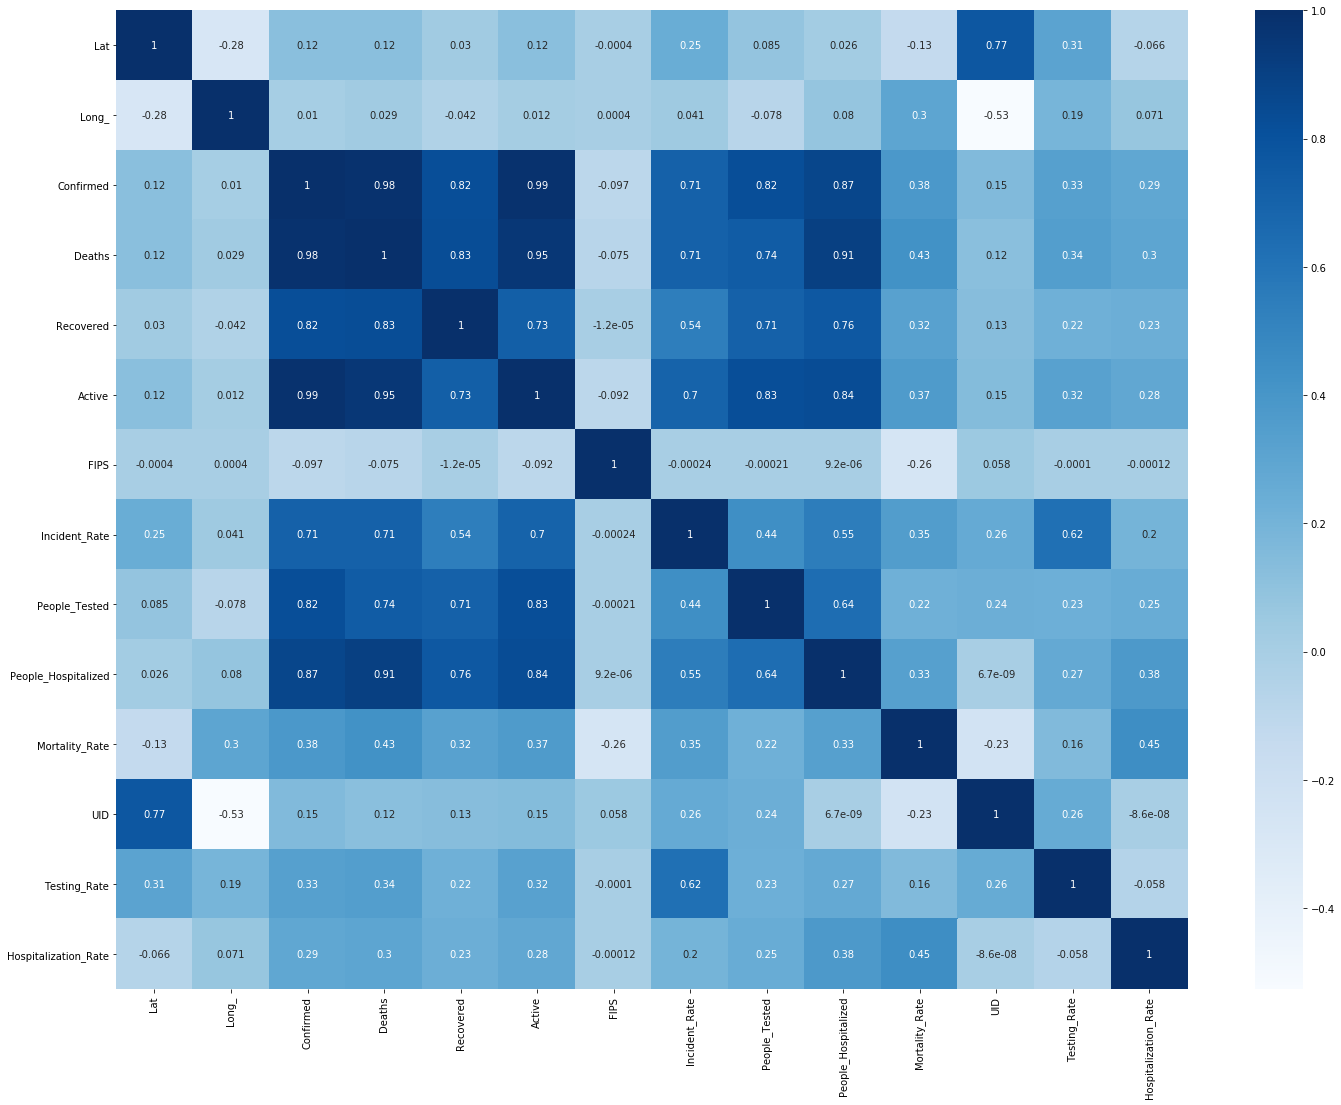

In [10]:
#checking correlation
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Deaths are negatively correlated with FIPS and ISO3

In [11]:
#lets drop columns which are having same information like country_region and last_update
#For US Country on the same date we predicting so lets drop that two columns
df.drop(columns=['Country_Region','Last_Update','ISO3','FIPS','Long_','UID'],inplace=True)


In [12]:
#Describing the statistics
df.describe()

,Lat,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,36.840089,26756.086207,1611.017241,7007.428571,20070.724138,396.230806,2.258534e+05,4897.454545,4.458248,3894.186870,14.342541
std,10.694329,52562.031122,4084.750891,9901.304545,41294.705318,395.554852,2.934948e+05,9879.577790,2.116191,1898.951207,3.781861
min,-14.271000,0.000000,0.000000,13.000000,0.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,6.778043
25%,34.872800,2596.000000,74.000000,1281.750000,812.500000,154.909239,4.745000e+04,1454.500000,3.116158,2741.843521,12.829963
50%,38.978600,10148.500000,385.000000,4987.000000,5644.500000,259.009335,1.433085e+05,4897.454545,4.409323,3501.526835,14.342541
75%,42.214075,29395.500000,1394.250000,7007.428571,19291.250000,462.828082,2.646656e+05,4897.454545,5.450908,4622.586404,15.552021
max,61.370700,354370.000000,28636.000000,61886.000000,263848.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


Observations:
    1)Minimum count of deaths are 0 and maximum is 28636
    2)Minimum count of recovered are 13 and maximum is 618856
    3)Minimum count of confirmed are 0 and maximum is 354370
    4)mean of the deaths are 10% of the active cases
    

In [13]:
#checking skewness
df.skew()

Lat                    -2.250097
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text yticklabel objects>)

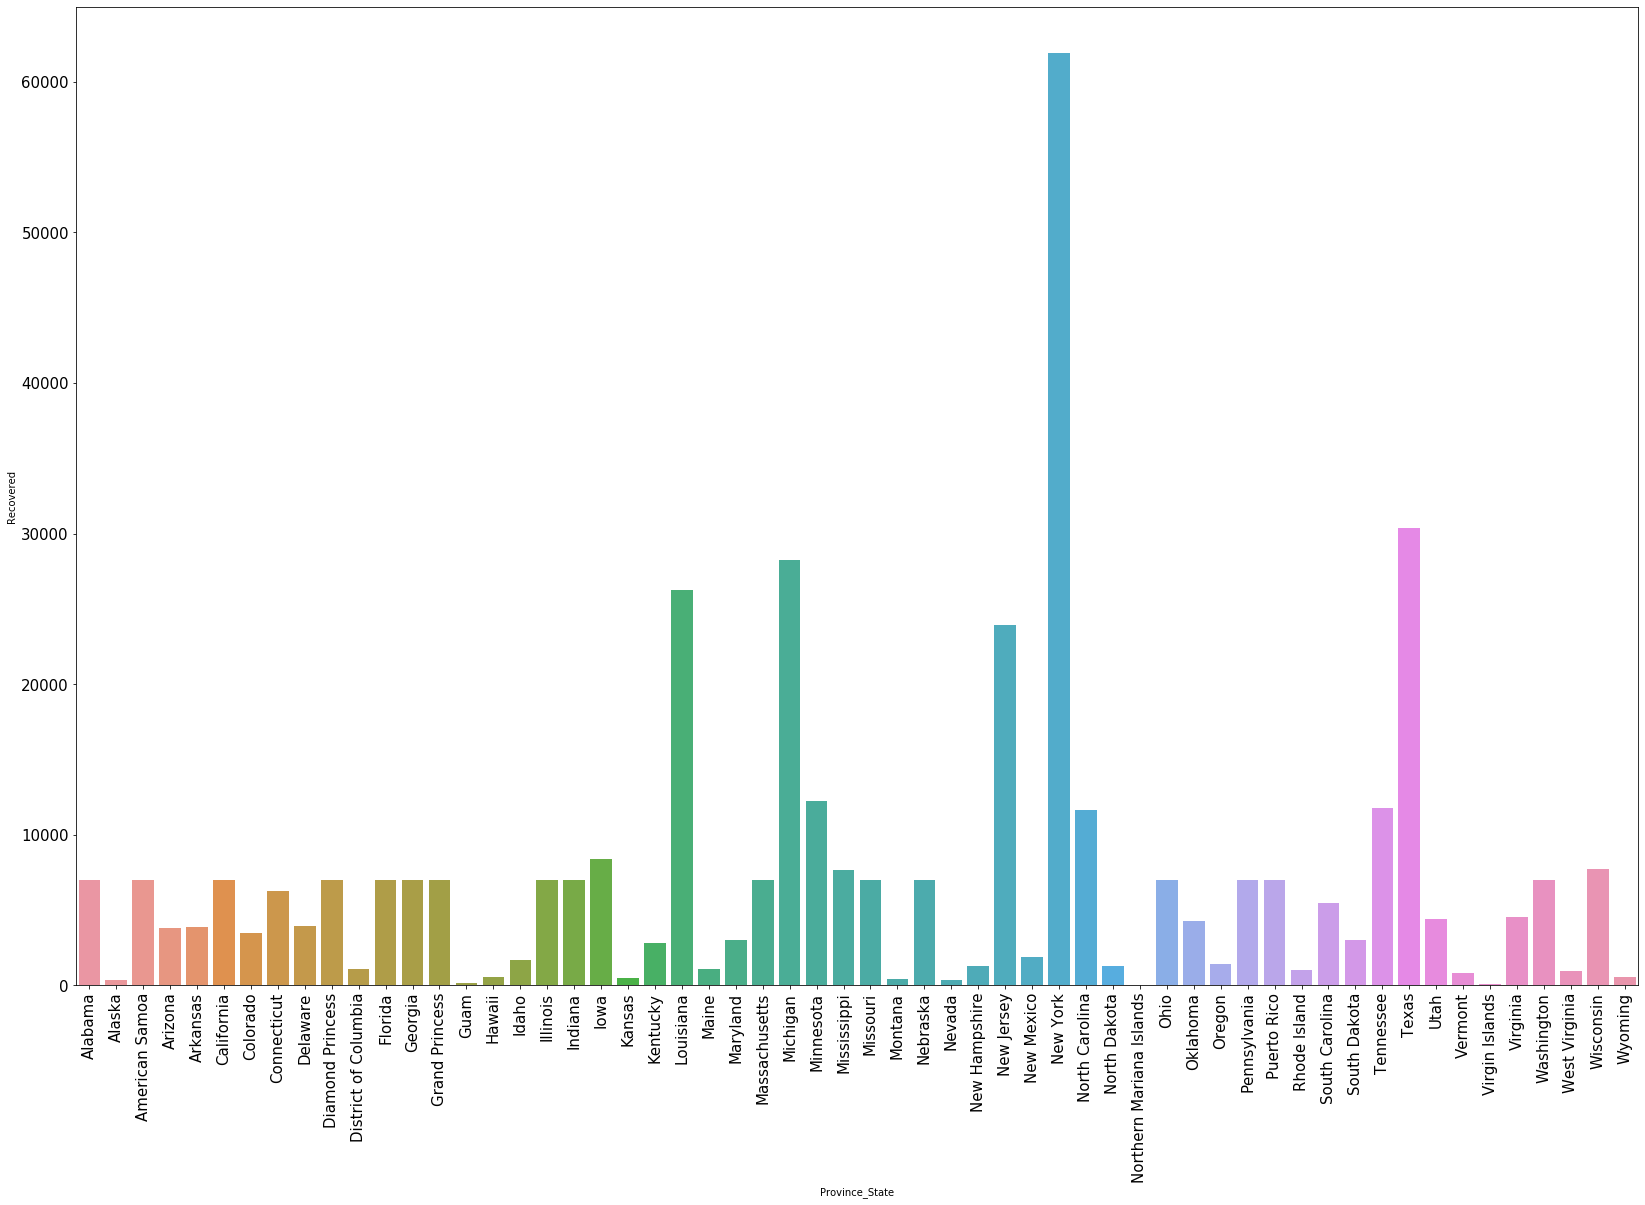

In [14]:
#Data Visualization
plt.figure(figsize=(28,18))
sns.barplot(y='Recovered',x='Province_State',data=df)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

Recovered patients are more in New York followed by Texas

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]),
 <a list of 9 Text yticklabel objects>)

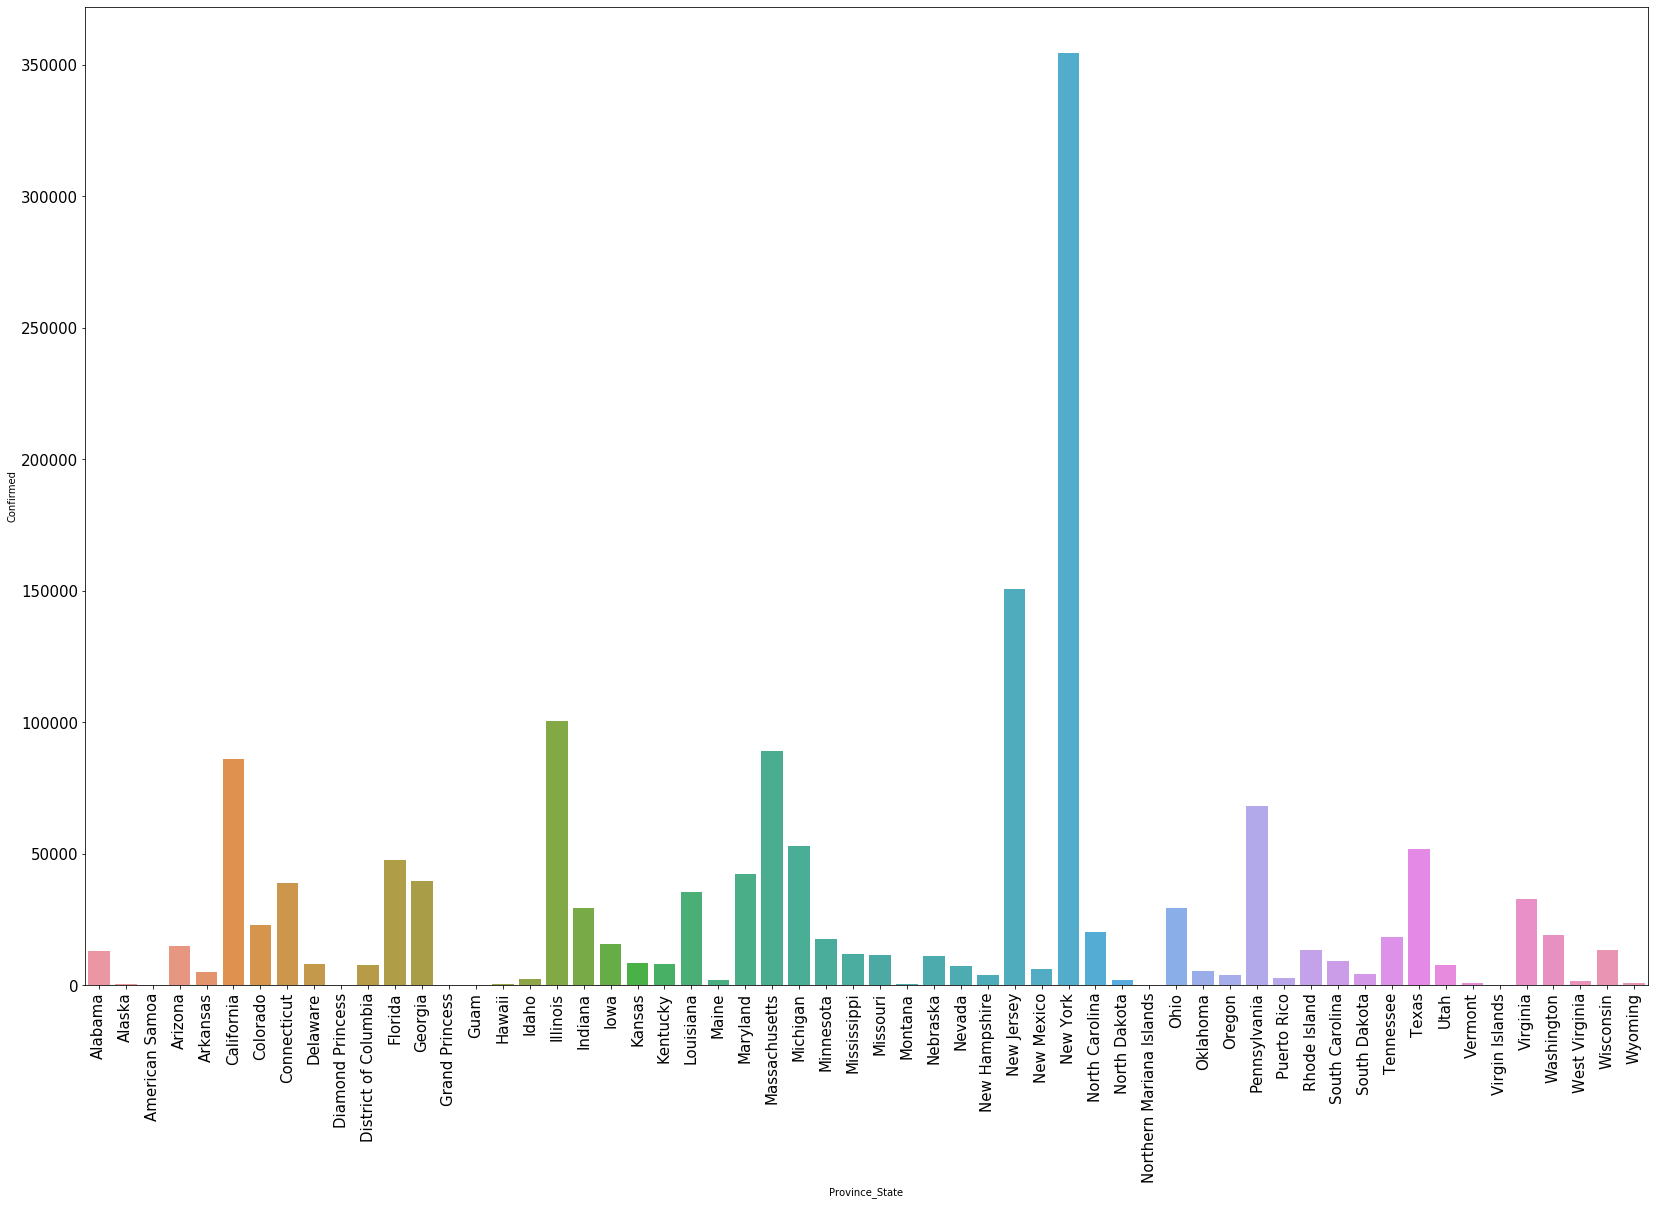

In [15]:
#province state vs confirmed cases
plt.figure(figsize=(28,18))
sns.barplot(x='Province_State',y='Confirmed',data=df)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

new york is having highest confirmed cases followed by New Jersey

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text yticklabel objects>)

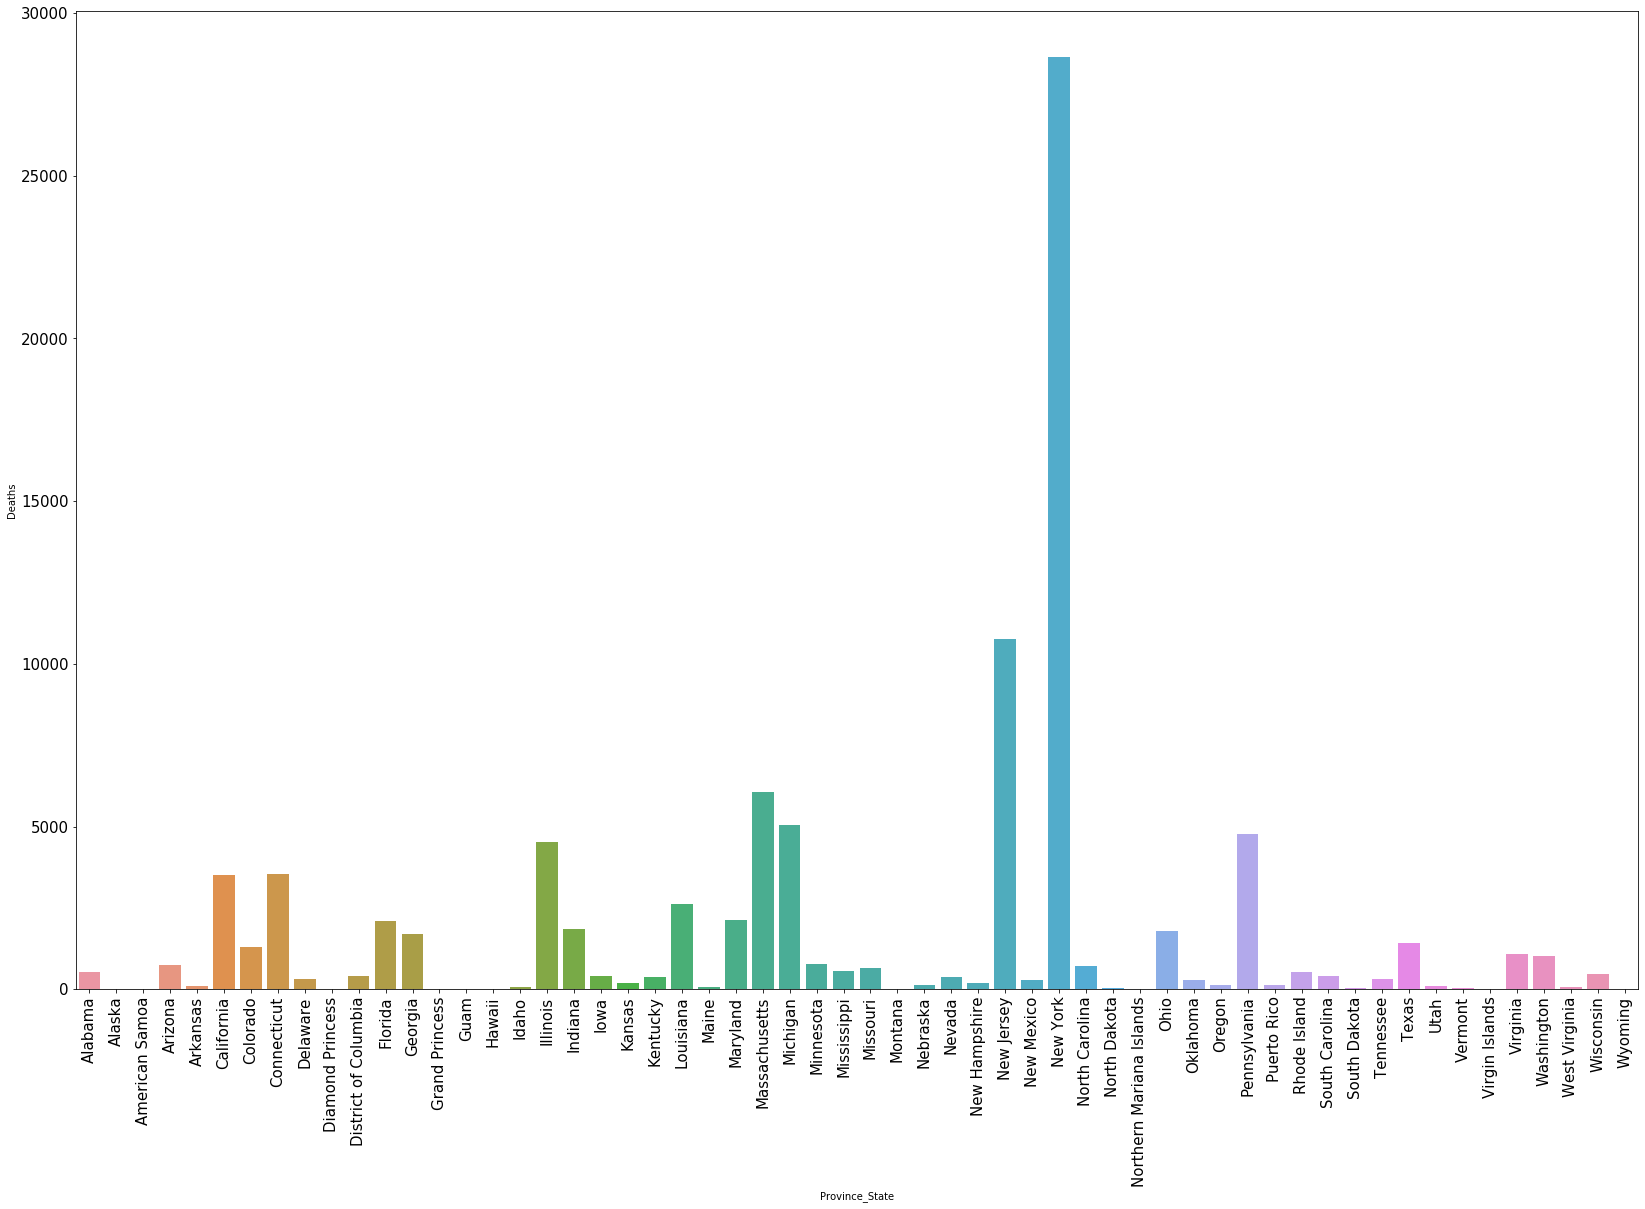

In [16]:
#province state vs Deaths
plt.figure(figsize=(28,18))
sns.barplot(x='Province_State',y='Deaths',data=df,)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

Deaths also high in new york only followed by New Jersey

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 <a list of 7 Text yticklabel objects>)

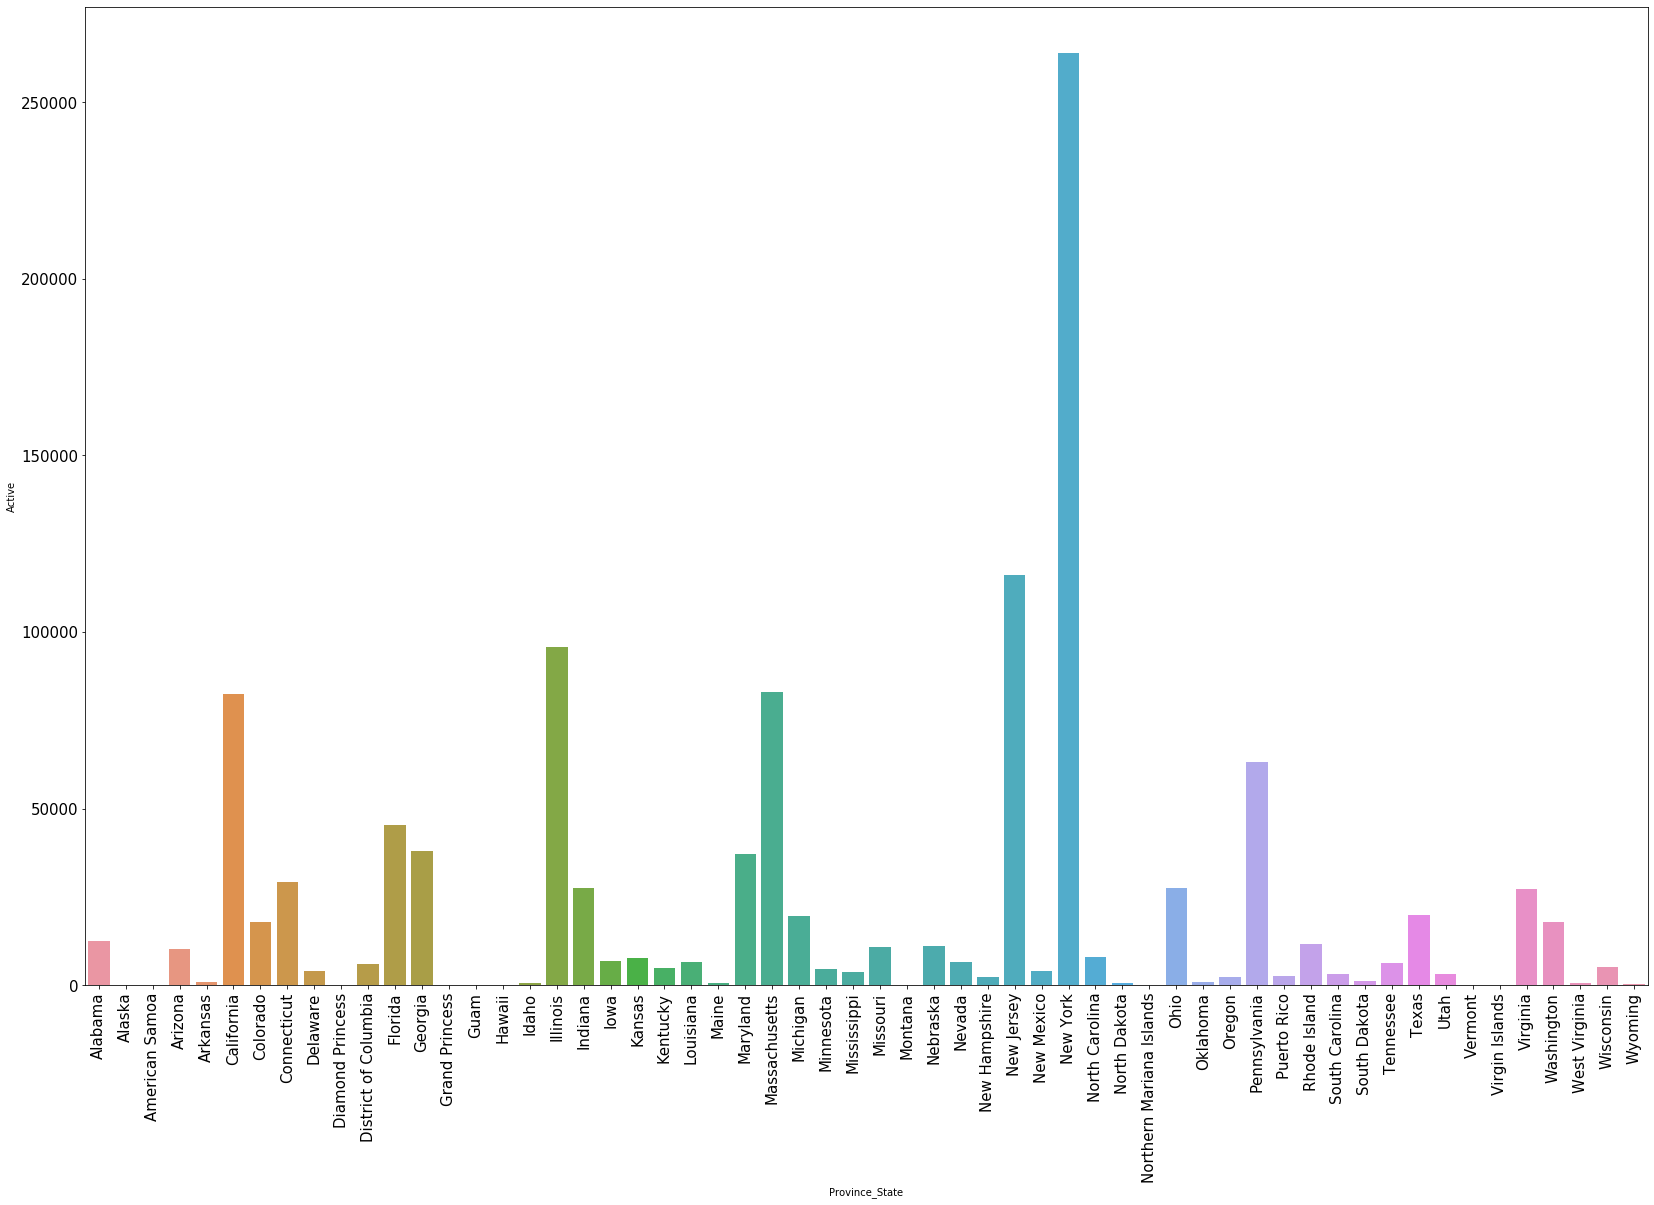

In [17]:
#province state vs Active
plt.figure(figsize=(28,18))
sns.barplot(x='Province_State',y='Active',data=df,)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

Active cases are more in New York followed by New Jersey

Text(0, 0.5, 'recovered')

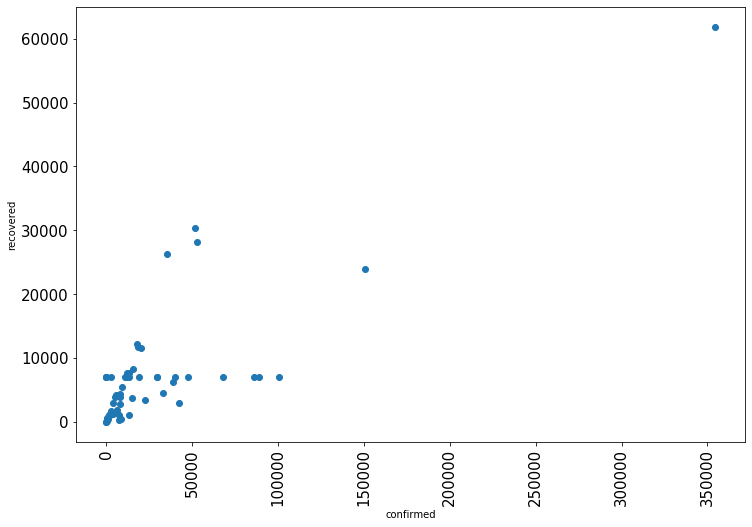

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(y='Recovered',x='Confirmed',data=df)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('confirmed')
plt.ylabel('recovered')

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]),
 <a list of 9 Text yticklabel objects>)

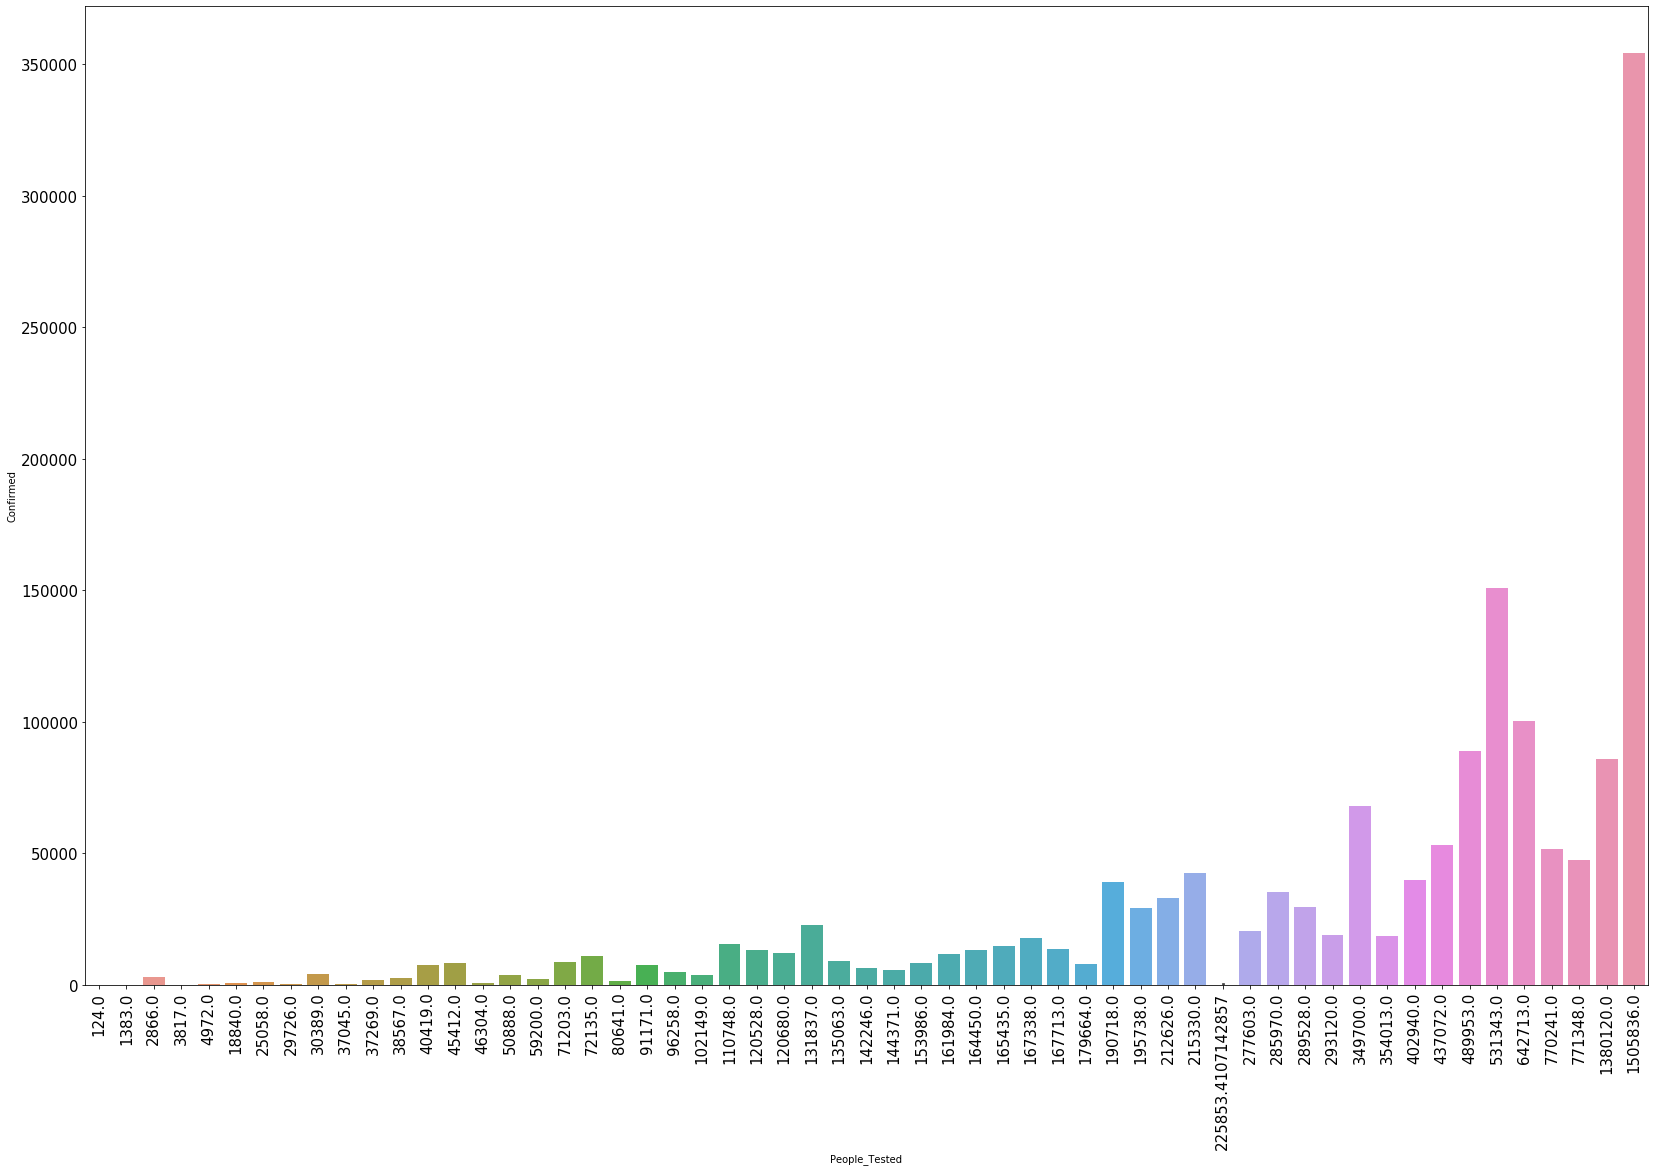

In [19]:
plt.figure(figsize=(28,18))
sns.barplot(x='People_Tested',y='Confirmed',data=df)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

If more the people tested more confirmed cases are there

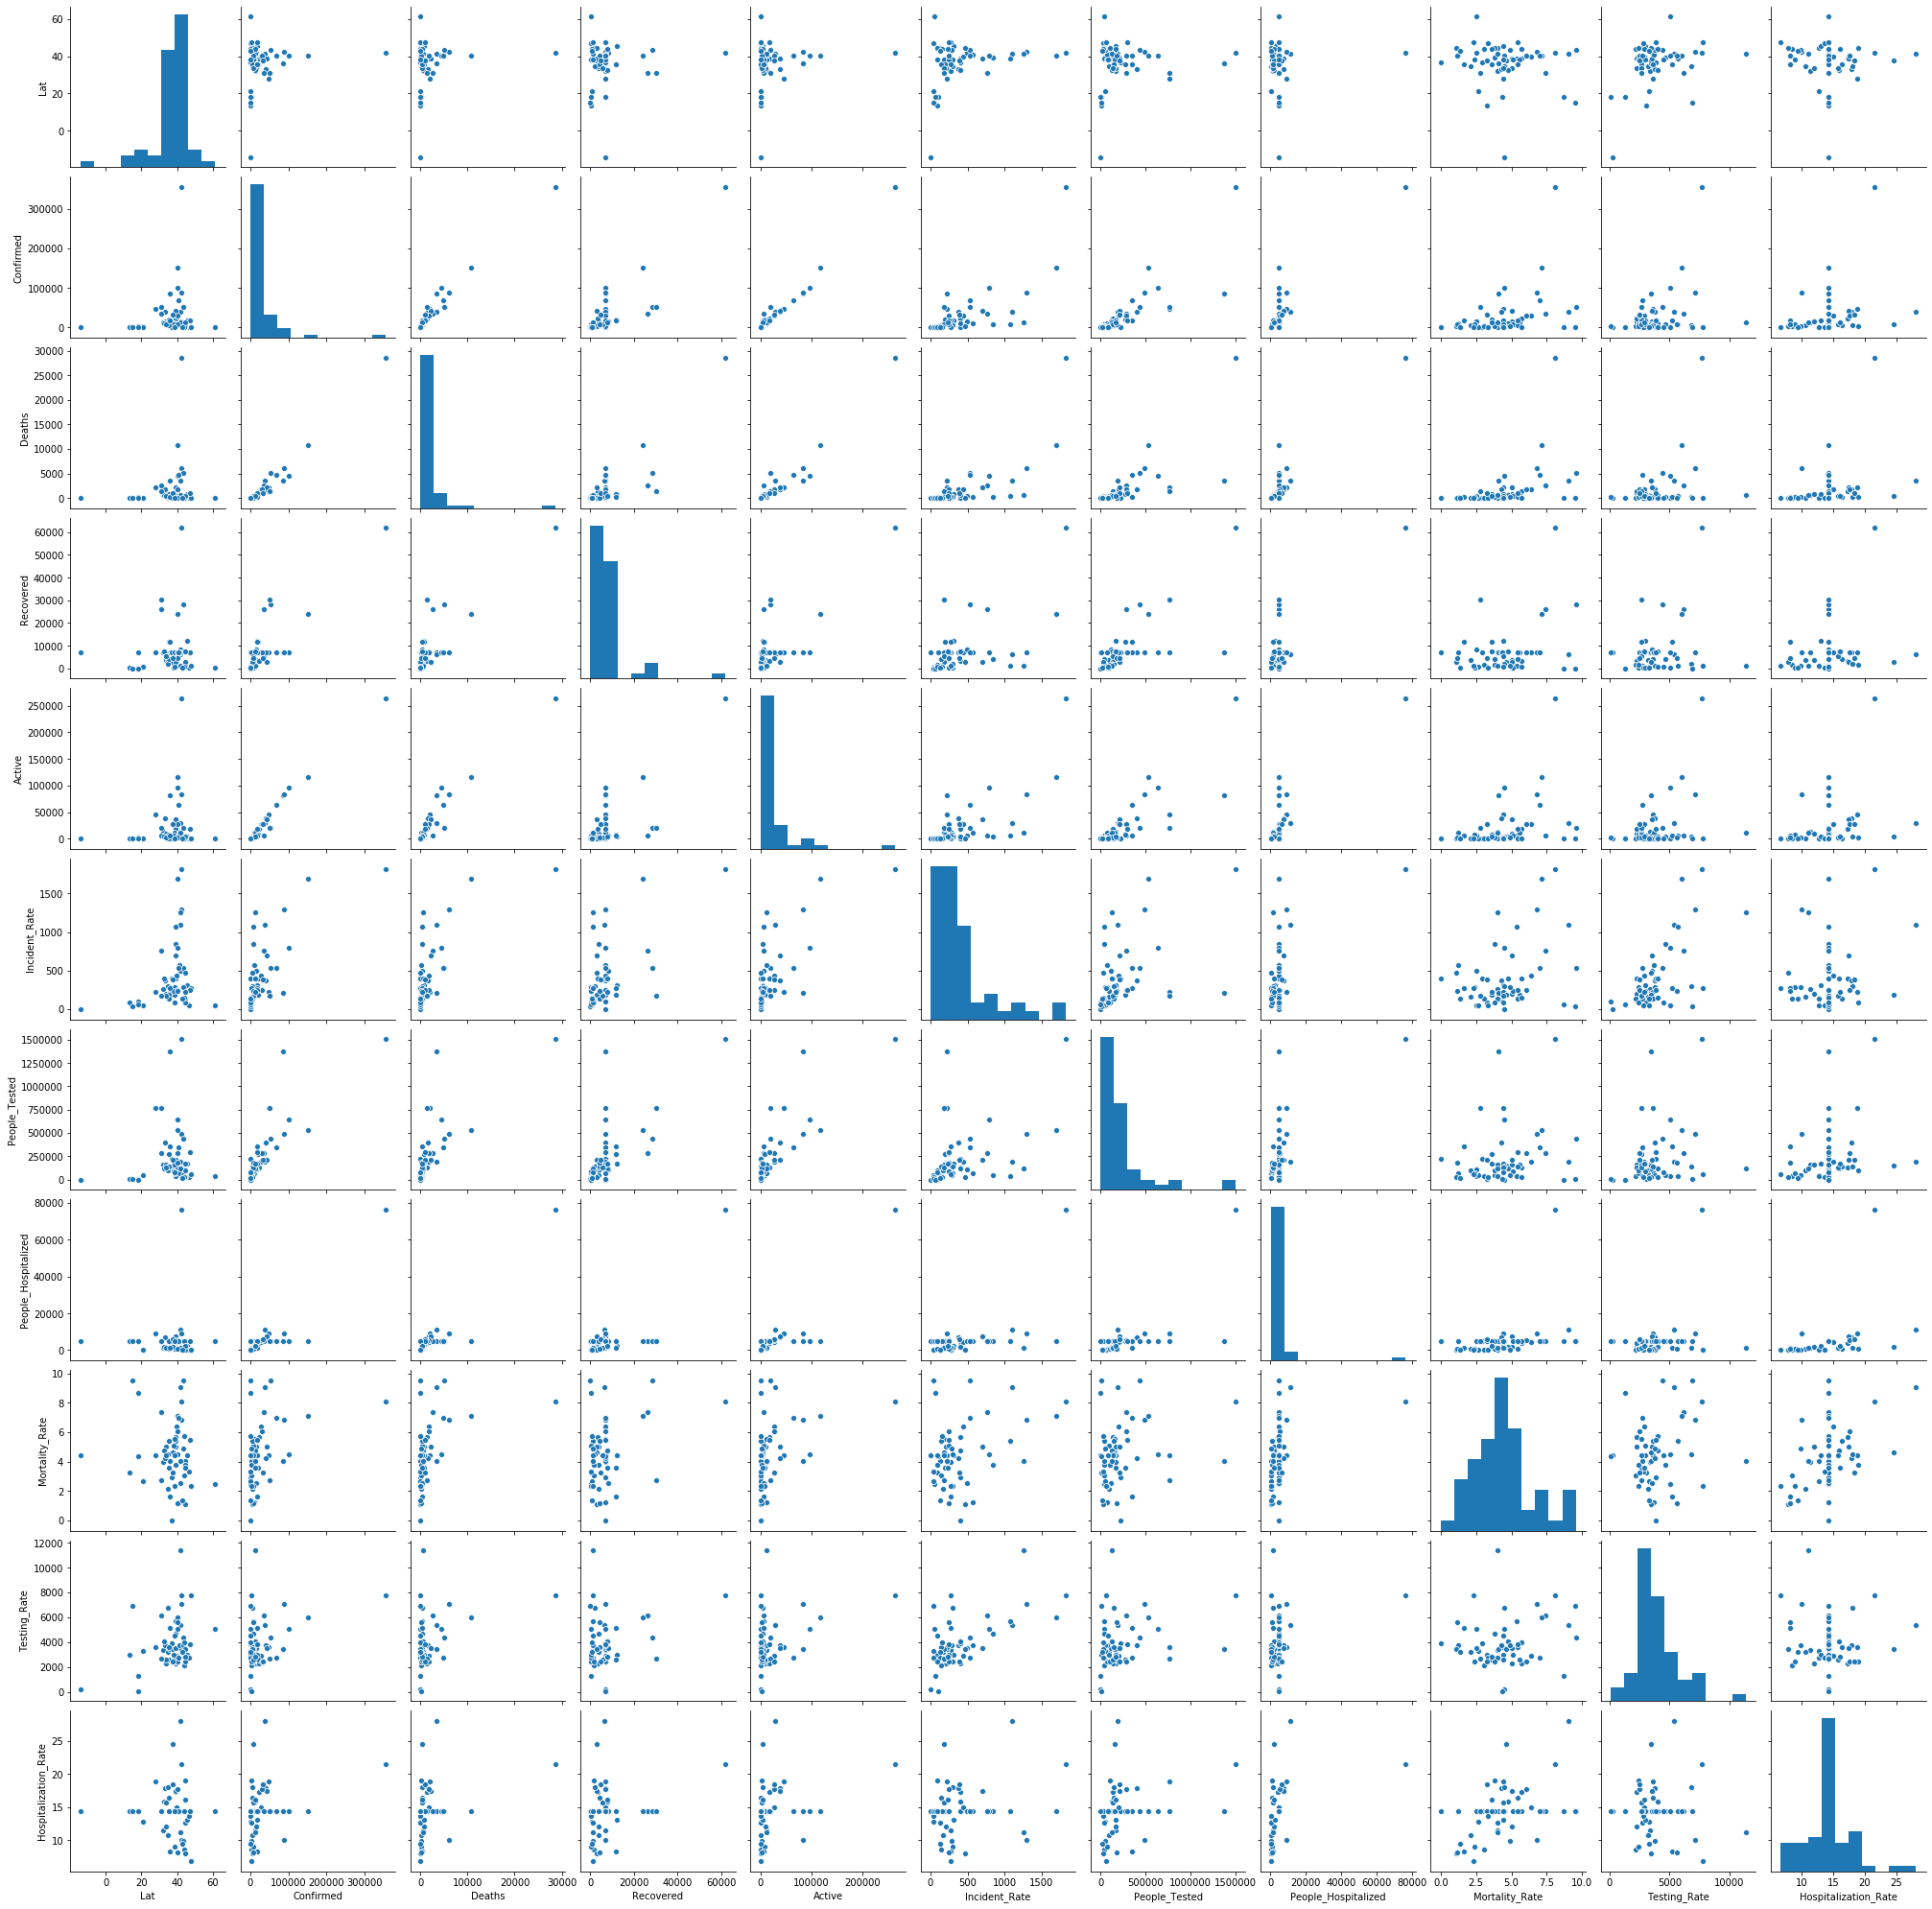

In [20]:
sns.pairplot(df)

In [21]:
#converting all the states to numerical representation
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df1=df.iloc[:,0].values
df.iloc[:,0]=l.fit_transform(df1.astype(str))

In [22]:
df.head()

,Province_State,Lat,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,32.3182,13052,522,7007.428571,12530.0,266.194321,164450.0,1493.000000,3.999387,3353.942386,11.438860
1,1,61.3707,401,10,352.000000,39.0,54.815493,37045.0,4897.454545,2.493766,5063.940017,14.342541
2,2,-14.2710,0,0,7007.428571,0.0,0.000000,124.0,4897.454545,4.458248,222.857246,14.342541
3,3,33.7298,14906,747,3773.000000,10386.0,204.788838,165435.0,1792.000000,5.011405,2272.859351,12.022005
4,4,34.9697,5003,107,3852.000000,1044.0,165.782801,96258.0,535.000000,2.138717,3189.670370,10.693584


In [23]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z)
threshold=3
print(np.where(z>3))

[[1.70244092e+00 4.26523477e-01 2.62999251e-01 2.68934023e-01
  0.00000000e+00 1.84202386e-01 3.31615693e-01 2.11041917e-01
  3.47604767e-01 2.18727182e-01 2.86980973e-01 7.74497410e-01]
 [1.64270615e+00 2.31382962e+00 5.05788407e-01 3.95372994e-01
  6.78047590e-01 4.89328519e-01 8.70668532e-01 6.48929571e-01
  0.00000000e+00 9.36418161e-01 6.21379592e-01 4.73806709e-16]
 [1.58297138e+00 4.82101134e+00 5.13484119e-01 3.97842505e-01
  0.00000000e+00 4.90281199e-01 1.01045759e+00 7.75826083e-01
  0.00000000e+00 4.23371775e-16 1.95023139e+00 4.73806709e-16]
 [1.52323661e+00 2.93375472e-01 2.27418578e-01 2.13370022e-01
  3.29519951e-01 2.36575329e-01 4.88210372e-01 2.07656498e-01
  3.17075993e-01 2.63675605e-01 8.61258492e-01 6.18955558e-01]
 [1.46350184e+00 1.76422927e-01 4.17470037e-01 3.71418736e-01
  3.21471520e-01 4.64778702e-01 5.87682563e-01 4.45416038e-01
  4.45419369e-01 1.10566079e+00 3.74243212e-01 9.73284504e-01]
 [1.40376707e+00 6.82802598e-02 1.13691024e+00 4.65745547e-01
  0

In [24]:
df_new=df[(z<3).all (axis=1)]
df_new

,Province_State,Lat,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,32.318200,13052,522,7007.428571,12530.0,266.194321,164450.000000,1493.000000,3.999387,3353.942386,11.438860
1,1,61.370700,401,10,352.000000,39.0,54.815493,37045.000000,4897.454545,2.493766,5063.940017,14.342541
3,3,33.729800,14906,747,3773.000000,10386.0,204.788838,165435.000000,1792.000000,5.011405,2272.859351,12.022005
4,4,34.969700,5003,107,3852.000000,1044.0,165.782801,96258.000000,535.000000,2.138717,3189.670370,10.693584
6,6,39.059800,22797,1299,3478.000000,18020.0,395.868121,131837.000000,3955.000000,5.698118,2289.339188,17.348774
8,8,39.318500,8194,310,3965.000000,3919.0,841.476990,45412.000000,4897.454545,3.783256,4663.552976,14.342541
9,9,36.840089,49,0,7007.428571,49.0,396.230806,225853.410714,4897.454545,0.000000,3894.186870,14.342541
10,10,38.897400,7551,407,1059.000000,6085.0,1069.927127,40419.000000,4897.454545,5.390015,5727.106946,14.342541
11,11,27.766300,47471,2096,7007.428571,45375.0,221.024217,771348.000000,8934.000000,4.415327,3591.383953,18.819911
12,12,33.040600,39801,1697,7007.428571,38104.0,374.864974,402940.000000,7107.000000,4.263712,3795.082856,17.856335


In [25]:
df_new.skew()

Province_State          0.009463
Lat                    -0.815328
Confirmed               2.035049
Deaths                  2.345123
Recovered               2.436455
Active                  2.599294
Incident_Rate           1.725869
People_Tested           1.784688
People_Hospitalized     0.112562
Mortality_Rate          0.528180
Testing_Rate            0.790802
Hospitalization_Rate    0.131538
dtype: float64

In [26]:
#removing skewness
df_new.skew()
for col in df_new.skew().index:
    if col in df_new.describe().columns:
        if df_new[col].skew()>0.55:
            df_new[col]=np.sqrt(df[col])
        if df_new[col].skew()<0.55:
            df_new[col]=np.cbrt(df[col])

In [27]:
df_new.skew()

Province_State         -1.360572
Lat                    -1.558051
Confirmed               0.819957
Deaths                  1.200498
Recovered               0.802158
Active                  1.218843
Incident_Rate           0.752210
People_Tested           0.595811
People_Hospitalized    -0.709266
Mortality_Rate         -1.998603
Testing_Rate           -1.415317
Hospitalization_Rate   -0.500921
dtype: float64

In [28]:
x=df_new.drop('Deaths',axis=1)
x.head()

,Province_State,Lat,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0.000000,3.185291,114.245350,83.710385,111.937483,16.315463,405.524352,11.429308,1.587320,14.968738,2.253171
1,1.000000,3.944455,20.024984,18.761663,6.244998,7.403749,192.470777,16.982051,1.356080,17.172342,2.429641
3,1.442250,3.231007,122.090131,61.424751,101.911727,14.310445,406.737016,12.146356,1.711275,13.147934,2.290827
4,1.587401,3.270122,70.731888,62.064483,32.310989,12.875667,310.254734,8.118041,1.288401,14.720253,2.203135
6,1.817121,3.392944,150.986754,58.974571,134.238594,19.896435,363.093652,15.814258,1.786119,13.179635,2.588747


In [29]:
df_new.shape

(52, 12)

In [30]:
x.shape

(52, 11)

In [31]:
y=df_new['Deaths'].values
y.shape

(52,)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
#feature scaling
#standardising the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [34]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [35]:
model=[LinearRegression(),Ridge(alpha=10),Lasso(alpha=1),ElasticNet(alpha=0.0001),SVR(kernel='linear'),RandomForestRegressor()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('r2 score:',r2_score(y_test,predm))
    print('mean absolute error:',mean_absolute_error(y_test,predm))
    print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

r2 score: 0.6803798203969345
mean absolute error: 6.15026375612219
root mean squared error: 7.936214042571229


r2 score: 0.743992993929832
mean absolute error: 5.890063117324738
root mean squared error: 7.10267923885123


r2 score: 0.7261686063999715
mean absolute error: 5.047926419349746
root mean squared error: 7.345779622189324


r2 score: 0.680379197899379
mean absolute error: 6.152709654890794
root mean squared error: 7.936221770918421


r2 score: 0.7814865813190602
mean absolute error: 5.465250432150041
root mean squared error: 6.561986500778536


r2 score: 0.7255344715913863
mean absolute error: 5.175505152944366
root mean squared error: 7.354280329056767




among all models SVR is working good so lets cross validate

In [36]:
#cross validation for SVR
from sklearn.model_selection import cross_val_score
svrscores=cross_val_score(SVR(kernel='linear'),x,y,cv=3)
print(svrscores)
print(svrscores.mean())


[0.8025443  0.77988114 0.88883515]
0.8237535308083889


In [37]:
#SVR tunning using GridSearchCV
from sklearn.model_selection import GridSearchCV
param={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,5,10]}
grids=GridSearchCV(SVR(),param,cv=3)
grids.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
pred=grids.predict(x_test)
print('r2 score:',r2_score(y_test,pred))

r2 score: 0.7814865813190602


In [39]:
#saving a model
from sklearn.externals import joblib
joblib.dump(grids,'deaths.pkl')

['deaths.pkl']

# US Country Recovered Prediction

In [40]:
#loading the file
df2=pd.read_csv('covid_new.csv')
df2.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [41]:
df2.shape

(58, 18)

In [42]:
#checking null values
df2.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [43]:
#treating with missing values
df2['Lat'].fillna(df2['Lat'].mean(),inplace=True)
df2['Long_'].fillna(df2['Long_'].mean(),inplace=True)
df2['Recovered'].fillna(df2['Recovered'].mean(),inplace=True)
df2['Incident_Rate'].fillna(df2['Incident_Rate'].mean(),inplace=True)
df2['People_Tested'].fillna(df2['People_Tested'].mean(),inplace=True)
df2['People_Hospitalized'].fillna(df2['People_Hospitalized'].mean(),inplace=True)
df2['Mortality_Rate'].fillna(df2['Mortality_Rate'].mean(),inplace=True)
df2['Testing_Rate'].fillna(df2['Testing_Rate'].mean(),inplace=True)
df2['Hospitalization_Rate'].fillna(df2['Hospitalization_Rate'].mean(),inplace=True)


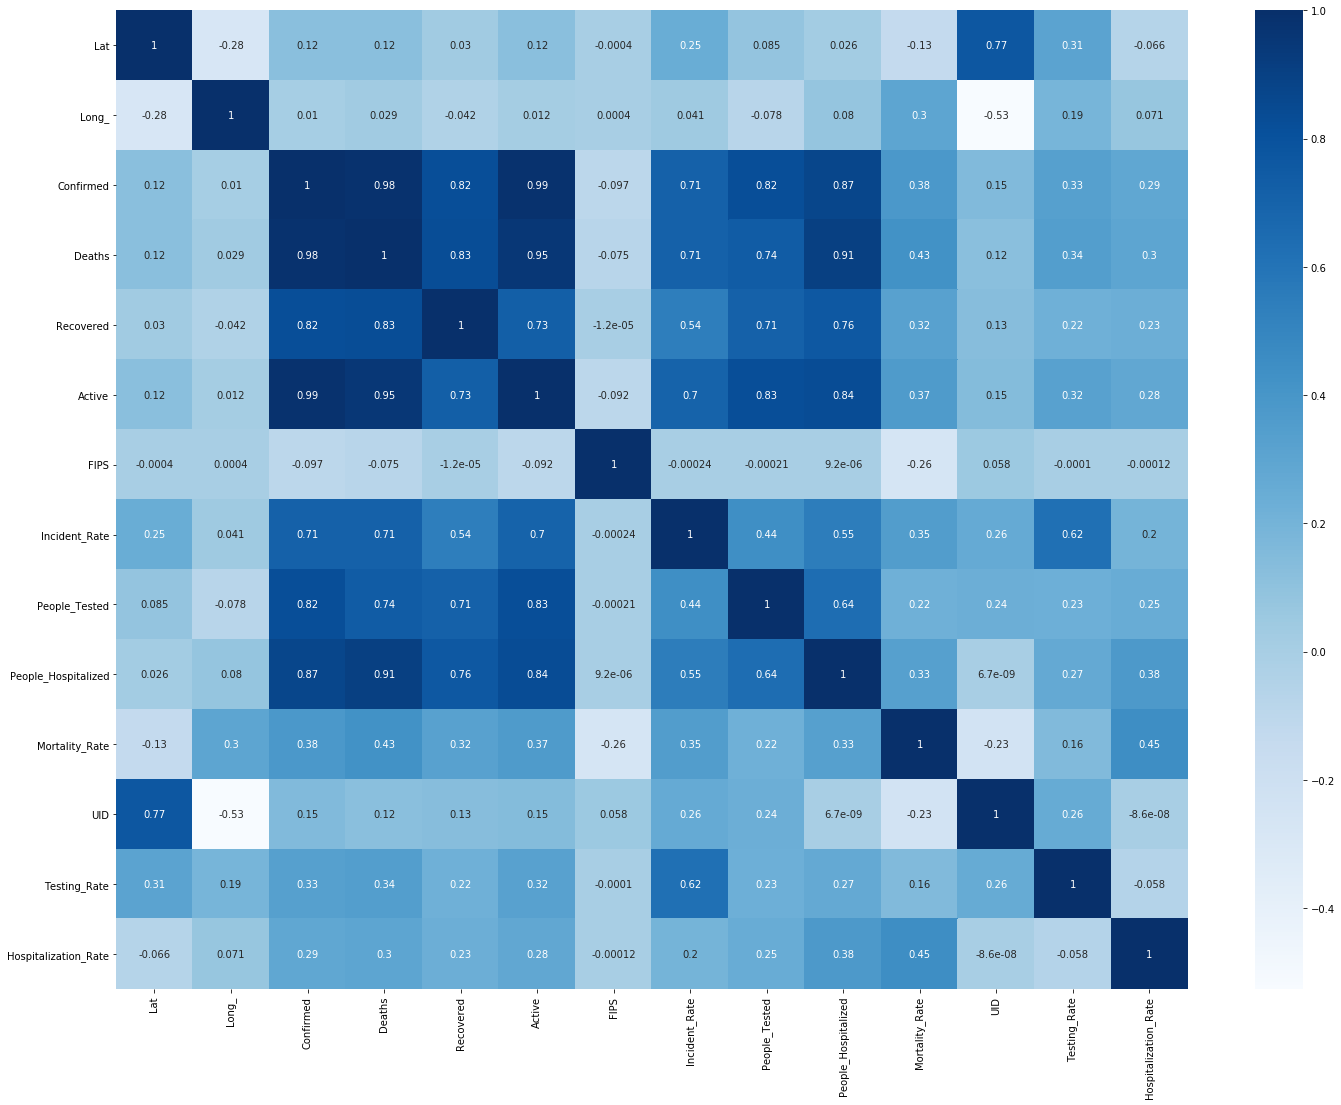

In [44]:
#checking correlation
plt.figure(figsize=(24,18))
sns.heatmap(df2.corr(),annot=True,cmap='Blues')

FIPS and Long_ are Negatively correlated with Recovered

In [45]:
#lets drop columns which are having same information like country_region and last_update
#For US Country on the same date we predicting so lets drop that two columns
df2.drop(columns=['Country_Region','Last_Update','FIPS','Long_','ISO3'],inplace=True)


In [46]:
#checking skewness
df2.skew()

Lat                    -2.250097
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]),
 <a list of 9 Text yticklabel objects>)

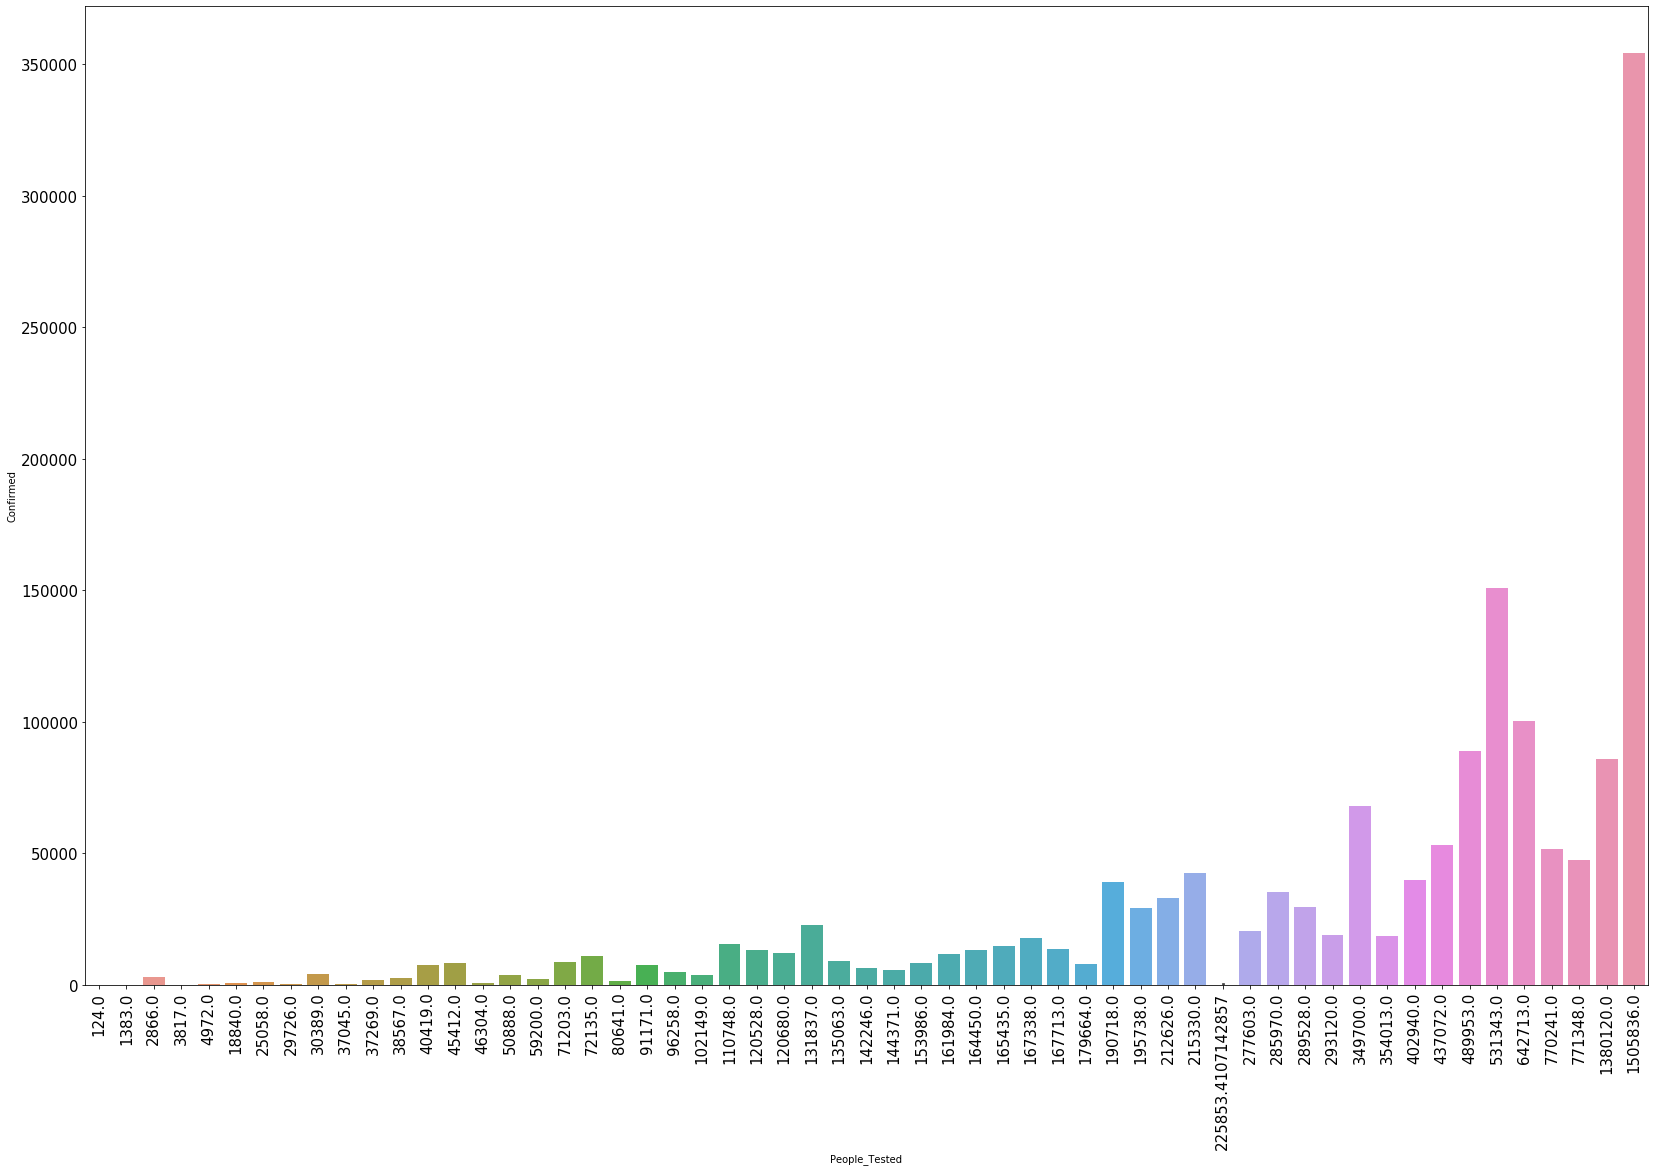

In [47]:
#data visualization
plt.figure(figsize=(28,18))
sns.barplot(x='People_Tested',y='Confirmed',data=df2)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

As the amount of people tested are more confirmed cases are also more

Text(0, 0.5, 'recovered')

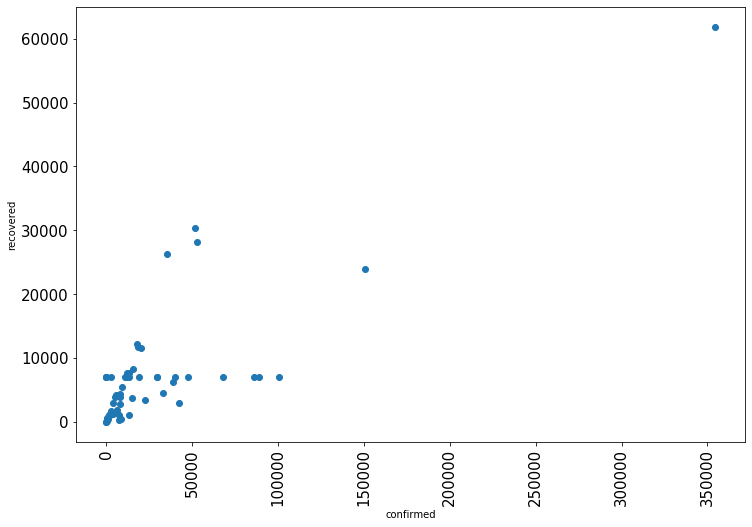

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(y='Recovered',x='Confirmed',data=df2)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('confirmed')
plt.ylabel('recovered')

In [49]:
#converting all the states to numerical representation
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df3=df2.iloc[:,0].values
df2.iloc[:,0]=l.fit_transform(df3.astype(str))

In [50]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df2))
print(z)
threshold=3
print(np.where(z>3))

[[1.70244092e+00 4.26523477e-01 2.62999251e-01 2.68934023e-01
  0.00000000e+00 1.84202386e-01 3.31615693e-01 2.11041917e-01
  3.47604767e-01 2.18727182e-01 3.06995177e-01 2.86980973e-01
  7.74497410e-01]
 [1.64270615e+00 2.31382962e+00 5.05788407e-01 3.95372994e-01
  6.78047590e-01 4.89328519e-01 8.70668532e-01 6.48929571e-01
  0.00000000e+00 9.36418161e-01 3.06995220e-01 6.21379592e-01
  4.73806709e-16]
 [1.58297138e+00 4.82101134e+00 5.13484119e-01 3.97842505e-01
  0.00000000e+00 4.90281199e-01 1.01045759e+00 7.75826083e-01
  0.00000000e+00 4.23371775e-16 3.25578286e+00 1.95023139e+00
  4.73806709e-16]
 [1.52323661e+00 2.93375472e-01 2.27418578e-01 2.13370022e-01
  3.29519951e-01 2.36575329e-01 4.88210372e-01 2.07656498e-01
  3.17075993e-01 2.63675605e-01 3.06995304e-01 8.61258492e-01
  6.18955558e-01]
 [1.46350184e+00 1.76422927e-01 4.17470037e-01 3.71418736e-01
  3.21471520e-01 4.64778702e-01 5.87682563e-01 4.45416038e-01
  4.45419369e-01 1.10566079e+00 3.06995347e-01 3.74243212e-0

In [51]:
df3=df2[(z<3).all(axis=1)]
df3

,Province_State,Lat,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,0,32.318200,13052,522,7007.428571,12530.0,266.194321,164450.000000,1493.000000,3.999387,84000001,3353.942386,11.438860
1,1,61.370700,401,10,352.000000,39.0,54.815493,37045.000000,4897.454545,2.493766,84000002,5063.940017,14.342541
3,3,33.729800,14906,747,3773.000000,10386.0,204.788838,165435.000000,1792.000000,5.011405,84000004,2272.859351,12.022005
4,4,34.969700,5003,107,3852.000000,1044.0,165.782801,96258.000000,535.000000,2.138717,84000005,3189.670370,10.693584
6,6,39.059800,22797,1299,3478.000000,18020.0,395.868121,131837.000000,3955.000000,5.698118,84000008,2289.339188,17.348774
8,8,39.318500,8194,310,3965.000000,3919.0,841.476990,45412.000000,4897.454545,3.783256,84000010,4663.552976,14.342541
9,9,36.840089,49,0,7007.428571,49.0,396.230806,225853.410714,4897.454545,0.000000,84088888,3894.186870,14.342541
10,10,38.897400,7551,407,1059.000000,6085.0,1069.927127,40419.000000,4897.454545,5.390015,84000011,5727.106946,14.342541
11,11,27.766300,47471,2096,7007.428571,45375.0,221.024217,771348.000000,8934.000000,4.415327,84000012,3591.383953,18.819911
12,12,33.040600,39801,1697,7007.428571,38104.0,374.864974,402940.000000,7107.000000,4.263712,84000013,3795.082856,17.856335


In [52]:
#removing skewness
df3.skew()
for col in df3.skew().index:
    if col in df3.describe().columns:
        if df3[col].skew()>0.55:
            df3[col]=np.sqrt(df2[col])
        if df3[col].skew()<0.55:
            df3[col]=np.cbrt(df2[col])

In [53]:
df3.skew()

Province_State         -1.332337
Lat                    -0.418401
Confirmed               0.806228
Deaths                  1.149693
Recovered               0.969000
Active                  1.179485
Incident_Rate           0.776638
People_Tested           0.833712
People_Hospitalized    -0.577973
Mortality_Rate         -2.236122
UID                     4.764449
Testing_Rate            0.954025
Hospitalization_Rate   -0.440350
dtype: float64

In [54]:
#spliting into x and y 
x=df3.drop('Recovered',axis=1)
x.head()

,Province_State,Lat,Confirmed,Deaths,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,0.000000,3.185291,114.245350,22.847319,111.937483,16.315463,405.524352,11.429308,1.587320,9165.151444,57.913232,2.253171
1,1.000000,3.944455,20.024984,3.162278,6.244998,7.403749,192.470777,16.982051,1.356080,9165.151499,71.161366,2.429641
3,1.442250,3.231007,122.090131,27.331301,101.911727,14.310445,406.737016,12.146356,1.711275,9165.151608,47.674515,2.290827
4,1.587401,3.270122,70.731888,10.344080,32.310989,12.875667,310.254734,8.118041,1.288401,9165.151663,56.477167,2.203135
6,1.817121,3.392944,150.986754,36.041643,134.238594,19.896435,363.093652,15.814258,1.786119,9165.151826,47.847039,2.588747


In [55]:
y=df3['Recovered'].values
y.shape

(48,)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
#feature scaling
#standardising the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [58]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [59]:
model=[LinearRegression(),Ridge(alpha=10),Lasso(alpha=1),ElasticNet(alpha=0.0001),SVR(kernel='linear'),RandomForestRegressor()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('r2 score:',r2_score(y_test,predm))
    print('mean absolute error:',mean_absolute_error(y_test,predm))
    print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

r2 score: 0.45416306892353275
mean absolute error: 23.002216532945003
root mean squared error: 29.770473169483793


r2 score: 0.712221206133294
mean absolute error: 17.31734481127999
root mean squared error: 21.616415179984294


r2 score: 0.651191101213507
mean absolute error: 19.183208292090413
root mean squared error: 23.7984162932538


r2 score: 0.45396367139663374
mean absolute error: 23.034987933166846
root mean squared error: 29.775910339778633


r2 score: 0.47666690918850174
mean absolute error: 21.84617454723208
root mean squared error: 29.150323402162616


r2 score: 0.2890916376303553
mean absolute error: 23.301159363135497
root mean squared error: 33.97512713311207




Among all the models random forest is fitting good

In [60]:
from sklearn.model_selection import cross_val_score
rdscores=cross_val_score(RandomForestRegressor(n_estimators=300),x,y,cv=5)
print(rdscores)
print(rdscores.mean())


[-0.12158823  0.4697247   0.54415391  0.55860385  0.56467915]
0.40311467501551


In [61]:
#Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
# randomized search cv
#no. of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#no. of feature consider at every split
max_features=['auto','sqrt']
# max. no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#Minimum no. of samples required to split a node
min_sample_split=[2,5,10,15,100]
#minimum no. of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [62]:
# create the random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_sample_split,
             'min_samples_leaf':min_samples_leaf
              }

In [63]:
rf_random=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=random_grid,scoring='r2',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [64]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [65]:
predictions=rf_random.predict(x_test)
predictions

array([ 54.31084425,  89.80019228,  37.20010826,  88.47056967,
        72.90871262,  76.50180836,  37.24360164,  37.20010826,
       111.33712766, 110.02507422])

among all random forest is working good so lets save that model

In [66]:
#saving a model
from sklearn.externals import joblib
joblib.dump(RandomForestRegressor(),'recovered.pkl')

['recovered.pkl']